In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

D:\Programs\Python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████████████████████████████████████████████████████████████████████████| 93.9k/93.9k [00:00<00:00, 365kB/s]

Extracting files...
Path to dataset files: C:\Users\Luan\.cache\kagglehub\datasets\lainguyn123\student-performance-factors\versions\8


In [6]:
df = pd.read_csv("D:/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/8/StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## *Descobrindo correlações

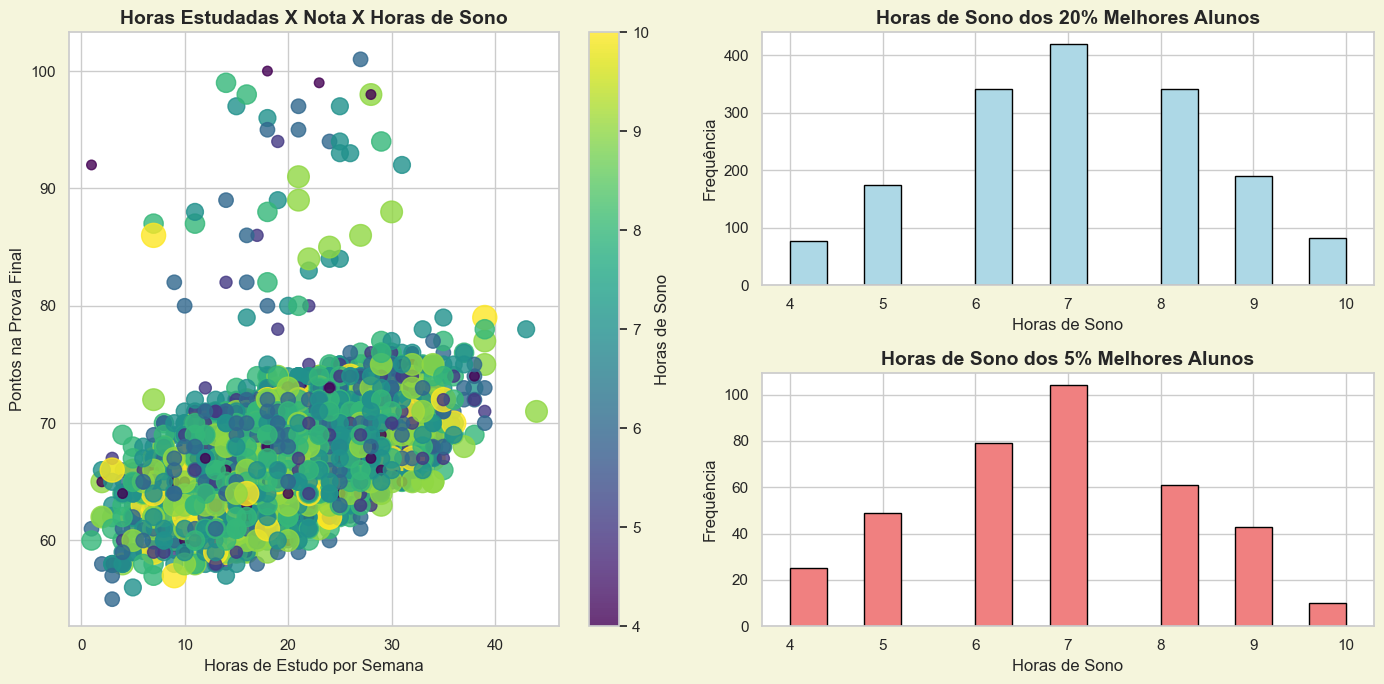

In [9]:
sns.set(style='whitegrid')

df_copy = df.copy()

mapping = {"Low": 0, "Medium": 1, "High": 2}
df_copy["Motivation_Level"] = df["Motivation_Level"].map(mapping)

fig = plt.figure(figsize=(14, 7))

ax1 = plt.subplot2grid((2, 2), (0, 0), rowspan=2)
scatter = ax1.scatter(
    df['Hours_Studied'], 
    df['Exam_Score'], 
    s=(df_copy['Sleep_Hours'] ** 2)*3, 
    c=df['Sleep_Hours'],
    cmap='viridis',  # Colormap viridis
    alpha=0.8
)
ax1.set_title('Horas Estudadas X Nota X Horas de Sono', fontsize=14, weight='bold')
ax1.set_xlabel('Horas de Estudo por Semana', fontsize=12)
ax1.set_ylabel('Pontos na Prova Final', fontsize=12)
fig.colorbar(scatter, ax=ax1, label='Horas de Sono')

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.set_title('Horas de Sono dos 20% Melhores Alunos', fontsize=14, weight='bold')
ax2.set_xlabel('Horas de Sono', fontsize=12)
ax2.set_ylabel('Frequência', fontsize=12)
x2 = df[df['Exam_Score'] >= df['Exam_Score'].quantile(0.80)]['Sleep_Hours']
ax2.hist(x2, color='lightblue', edgecolor='black', bins=15)

ax3 = plt.subplot2grid((2, 2), (1, 1))
ax3.set_title('Horas de Sono dos 5% Melhores Alunos', fontsize=14, weight='bold')
ax3.set_xlabel('Horas de Sono', fontsize=12)
ax3.set_ylabel('Frequência', fontsize=12)
x3 = df[df['Exam_Score'] >= df['Exam_Score'].quantile(0.95)]['Sleep_Hours']
ax3.hist(x3, color='lightcoral', edgecolor='black', bins=15)

fig.patch.set_facecolor('#f5f5dc') 

plt.tight_layout()

fig.savefig('plot.png', bbox_inches='tight')


In [8]:
df[df['Exam_Score'] > 150]['Sleep_Hours']

Series([], Name: Sleep_Hours, dtype: int64)